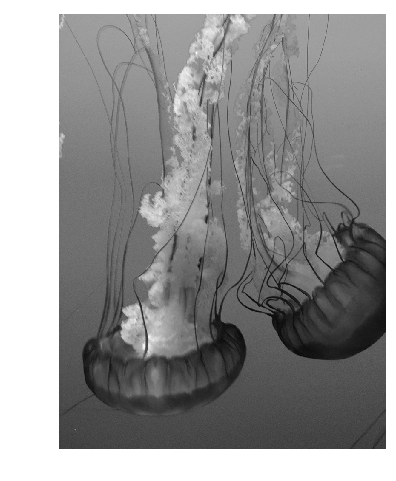

In [40]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

A = imread(os.path.join('..','DATA','jelly.jpg'))
Abw = np.mean(A, -1); # Convert RGB to grayscale

plt.imshow(Abw,cmap='gray')
plt.axis('off')
plt.show()

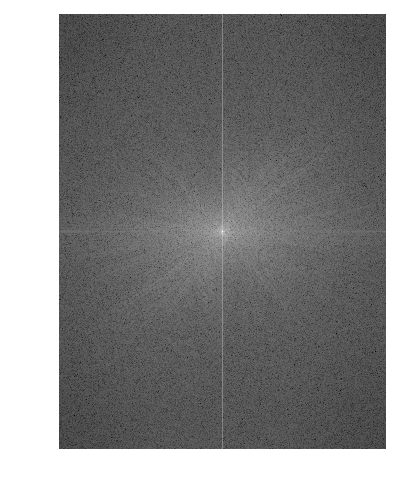

In [41]:
## Compute FFT of image using fft2
At = np.fft.fft2(Abw)
F = np.log(np.abs(np.fft.fftshift(At))+1) # Put FFT on log scale
plt.imshow(F,cmap='gray')
plt.axis('off')
plt.show()

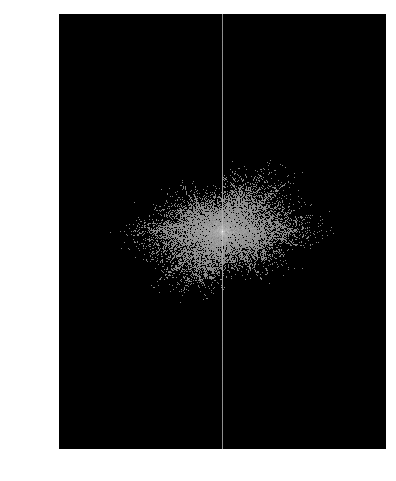

In [42]:
## Zero out all small coefficients and inverse transform
Bt = np.sort(np.abs(np.reshape(At,-1)))
keep = 0.05
thresh = Bt[int(np.floor((1-keep)*len(Bt)))]
ind = np.abs(At) > thresh
Atlow = At * ind
Flow = np.log(np.abs(np.fft.fftshift(Atlow))+1) # Put FFT on log scale

plt.imshow(Flow,cmap='gray')
plt.axis('off')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


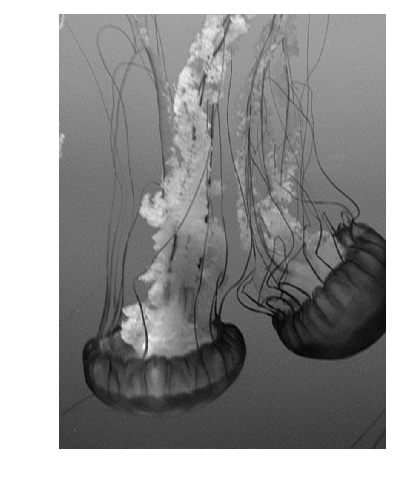

In [43]:
## Plot Reconstruction
Alow = np.fft.ifft2(Atlow).astype('uint8')

plt.imshow(Alow,cmap='gray')
plt.axis('off')
plt.show()

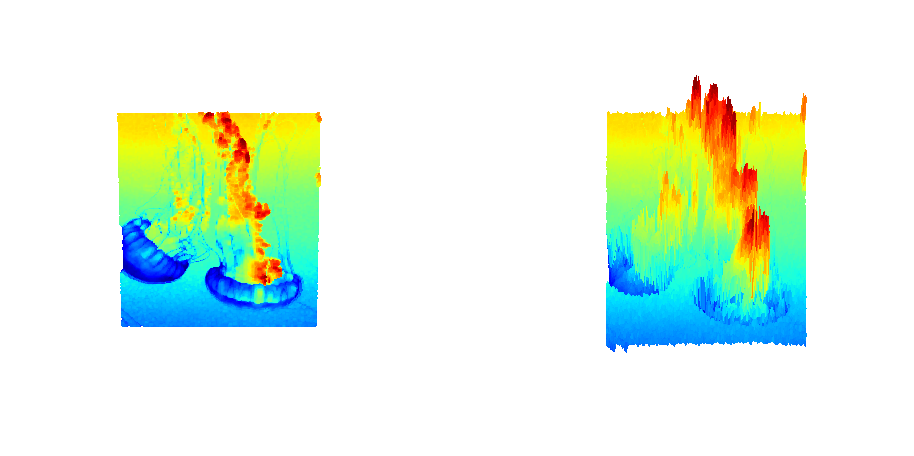

In [61]:
plt.rcParams['figure.figsize'] = [16, 8]

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

Anew = Abw[::5,::5]

y = np.arange(Anew.shape[0])
x = np.arange(Anew.shape[1])

X,Y = np.meshgrid(x,y)

surf1 = ax1.plot_surface(X,Y,Anew, rstride=1, cstride=1,cmap='jet',
                       linewidth=1, antialiased=False)
surf2 = ax2.plot_surface(X,Y,Anew, rstride=1, cstride=1,cmap='jet',
                       linewidth=1, antialiased=False)

ax1.view_init(90, 90) 
ax1.axis('off')

ax2.view_init(60, 90) 
ax2.axis('off')

plt.show()